In [ ]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [4]:
!pip install japanize_matplotlib

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# (1)　分類のためのデータセット作成

n_samples		：サンプルデータポイントの個数（点の個数）
デフォルトは100。

centers			：中心の個数（この数だけクラスができる。）

n_features		：説明変数 X の次元。デフォルトは 2 。

random_state	：デフォルトは None。None 以外の値にすると結果
が毎回固定される。 42 にすることが多い。

cluster_std		：データの散らばり度合。デフォルトは1.0。





In [22]:
# --------------------(1)-----------------------
X, y = make_blobs(n_samples=500, random_state=4,
                  n_features=2, centers=3, cluster_std=2)
# print(X)
# print(y)

# (2)　データセットの散布図

<ipython-input-23-d1c51dc9f351>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y_color, cmap='viridis', alpha=0.7)


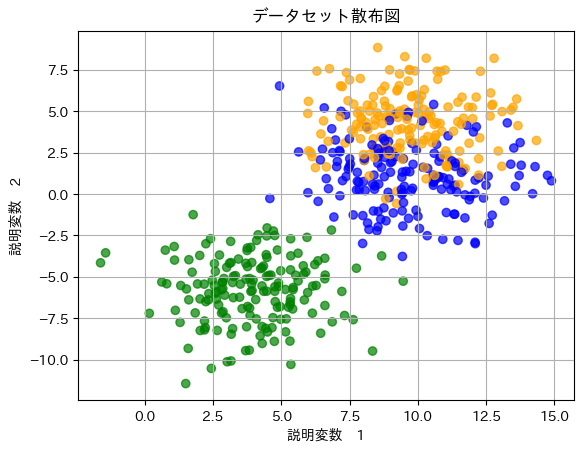

In [23]:
# --------------------(2)-----------------------
# 散布図をプロット
color_palette = ['blue', 'orange', 'green']
y_color = [color_palette[num] for num in y]
plt.scatter(X[:, 0], X[:, 1], c=y_color, cmap='viridis', alpha=0.7)

# グラフのカスタマイズ
plt.xlabel("説明変数　1")
plt.ylabel("説明変数　2")
plt.title("データセット散布図")

plt.grid()
# グラフを表示
plt.show()

# (3)　データセットの分離と予測モデル

In [24]:
# --------------------(3)-----------------------
# 学習データ(75%)とテストデータ(25%)へ分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

from sklearn.svm import SVC
# 線形カーネルを持つSVCモデル
model = SVC(kernel="linear")
model_name = 'SVC(kernel="linear")'
# 学習
model.fit(X_train, y_train)

SVC(kernel='linear')

# (4)  正解率

In [25]:
# --------------------(4)-----------------------
y_pred = model.predict(X_test)
seikairitsu = accuracy_score(y_test, y_pred)
print(f"テストデータの正解率は {seikairitsu*100} ％")

テストデータの正解率は 89.60000000000001 ％


plot_boundary 関数

In [16]:
from matplotlib.colors import ListedColormap

def plot_boundary(model, X, Y, target, xlabel, ylabel, model_name):
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])
    #ステップ関数
    def step_func(x,theta=0.5):
        if x >= theta :
            return 1.0
        else :
            return 0.0
    plt.figure(figsize=(7, 5))
    vfunc = np.vectorize(step_func)
    if 1:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        #pred = vfunc(vec_w[0]*XX + vec_w[1]*YY+vec_w[2])
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        plt.contour(XX, YY, pred, colors="gray")
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    #print("-------------------------------")
    #print(pred)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{model_name}による予測')
    plt.show()

#(5)  分類予測の境界線の可視化

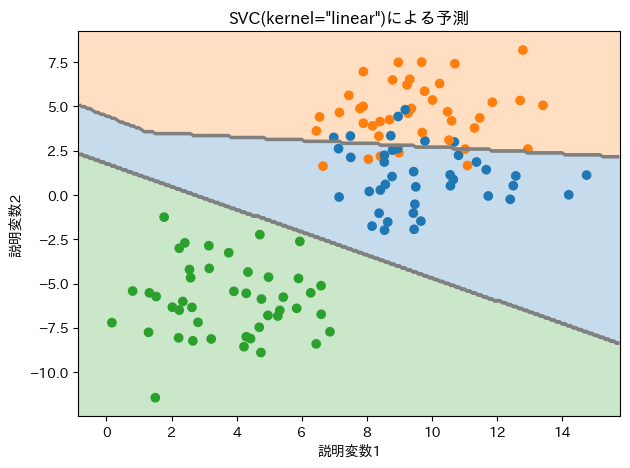

In [26]:
# --------------------(5)-----------------------
plot_boundary(model, X_test[:,0], X_test[:,1], y_test, "説明変数1", "説明変数2", model_name)